### This file is for generating test data.
* It is done by sampling from the 'projectSkills.txt'(tasks) and 'profiles.txt'(people).
* The two files are included in folder "/data" 
* It output a file containing the generated data as lists (package "pickle" is used) 

### Contents
* Part I & II are some inspectation on the two files
* Part III & IV are for cleaning the data
* Part V turns both in matrix forms
* Part VI samples 100 tasks and 400 people from the two sets, ensuring a valid cover can be made.

__________________________

In [ ]:
import pandas as pd
import numpy as np
import os 
from collections import Counter
import matplotlib.pyplot as plt
import pickle

## I. tasks 

In [2]:
def tasks_to_df(filename):
    temp = [] 
    universe = []
    with open(filename,'r') as file:
        for line in file:
            line = line.lower()
            s = line.split('\t')[1:-1]
            temp += [[s, len(s)]]
            universe += s
    return pd.DataFrame.from_records(temp),(universe)

In [3]:
tasks,skills = tasks_to_df('data/projectSkills.txt')

In [4]:
print(len(set(skills)))
sorted(dict(Counter(skills)).items(), key=lambda x:x[1])[-20:]

337


[('excel', 33),
 ('iphone', 35),
 ('logo design', 37),
 ('css', 39),
 ('sales', 40),
 ('seo', 41),
 ('articles', 43),
 ('javascript', 47),
 ('data entry', 50),
 ('wordpress', 50),
 ('marketing', 52),
 ('android', 52),
 ('mobile phone', 61),
 ('mysql', 71),
 ('software architecture', 71),
 ('internet marketing', 81),
 ('html', 165),
 ('website design', 197),
 ('graphic design', 197),
 ('php', 245)]

260
71
77
                 1
count  1061.000000
mean      3.056550
std       1.497358
min       1.000000
25%       2.000000
50%       3.000000
75%       5.000000
max       6.000000


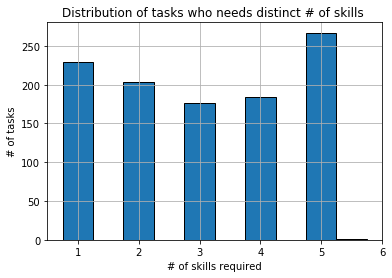

In [10]:
print (len(set(pskills) & set(skills)))
print (len(set(pskills) - set(skills)))
print (len(set(skills) - set(pskills)))
print(tasks.describe())
x = tasks[1]
plt.xlabel('# of skills required')
plt.ylabel('# of tasks')
plt.title('Distribution of tasks who needs distinct # of skills ')
plt.grid(True)
bin = plt.hist(x,align='left',linewidth=1,edgecolor='black')
plt.show()


In [90]:
tasks[1].max()

6

In [201]:
# def gtasks_to_df(filename):
#     temp = [] 
#     universe = []
#     with open(filename,'r') as file:
#         for line in file:
#             line = line.lower()
#             s = line.split('\t')[1][:-1].split(',')
#             temp += [[s, len(s)]]
#             universe += s
#     return pd.DataFrame.from_records(temp),(universe)

# gtasks, gskills = gtasks_to_df('data/guruProjectsInfo.txt')
# print(len(set(gskills)))
# sorted(dict(Counter(gskills)).items(), key=lambda x:x[1])[-10:]
# print (len(set(gskills) & set(pskills)))
# print (len(set(gskills) - set(pskills)))
# print (len(set(pskills) - set(gskills)))
# gtasks.describe()

## II. People

In [6]:
def people_to_df(filename):
    temp = [] 
    universe = []
    with open(filename,'r') as file:
        for line in file:
            line = line.lower()
            s = line.split('\t')[4:]
            s = [s[i] for i in range(len(s)) if i % 2 == 0]
            temp += [[s, len(s)]]
            universe += s
    return pd.DataFrame.from_records(temp),(universe)

In [7]:
people, pskills = people_to_df('data/profiles.txt')

In [8]:
print(len(set(pskills)))
sorted([len(list(group)) for key, group in groupby(pskills)])[-20:]

331


NameError: name 'groupby' is not defined

                 1
count  1763.000000
mean      4.626773
std       1.805908
min       1.000000
25%       3.000000
50%       6.000000
75%       6.000000
max       6.000000


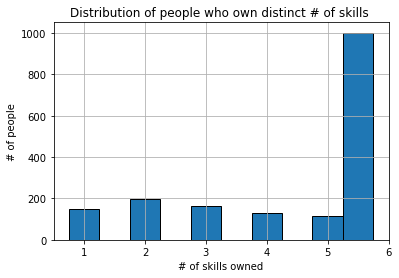

In [9]:
print(people.describe())
x = people[1]
plt.xlabel('# of skills owned')
plt.ylabel('# of people')
plt.title('Distribution of people who own distinct # of skills ')
plt.grid(True)
plt.hist(x,linewidth=1,align='left',edgecolor='black')
plt.show()

## III. Filter tasks

In [11]:
## delete those has skills that on one owns
null_skills = (set(skills) - set(pskills))
filtered_tasks = tasks[np.array([len(set(x) & null_skills)==0 for x in tasks[0]])]

In [12]:
## filter out those who need # skills >= 3
filtered_tasks = filtered_tasks[filtered_tasks[1]>=3]

In [13]:
filtered_tasks.index = range(len(filtered_tasks))

In [14]:
len(filtered_tasks)

555

In [94]:
filtered_tasks[1].max()

6

## IV. Filter people

In [15]:
## delete people whose skills are all irrelevent to the filtered_tasks
filtered_tasks_skills = []
for x in filtered_tasks[0]:
    filtered_tasks_skills += x
filtered_tasks_skills = set(filtered_tasks_skills)

In [16]:
filtered_people = people[np.array([len(set(x) & filtered_tasks_skills)>0 for x in people[0]])]

In [17]:
filtered_people.index = range(len(filtered_people))
len(filtered_people)

1749

## V. Turn into matrix

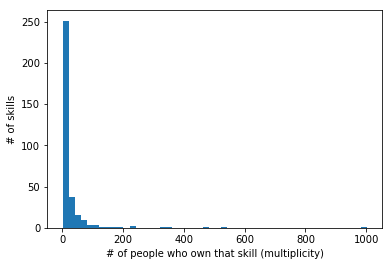

In [18]:
# create a universial series of skills
skills_series = []
for x in filtered_people[0]:
     skills_series += x
plt.figure()
plt.hist(sorted(dict(Counter(skills_series)).values()),bins =50)
plt.ylabel('# of skills')
plt.xlabel('# of people who own that skill (multiplicity)')
plt.show()
skills_series = list(set(skills_series))

In [19]:
print(len(skills_series),len(filtered_tasks_skills))

329 209


In [20]:
## P: people x skills matrix
temp = []
for ps in people[0]:
    temp += [[ x in ps for  x in skills_series]]
P = temp

In [111]:
## J: tasks x skills matrix
temp = []
for ts in filtered_tasks[0]:
    temp += [[ x in ts for  x in skills_series]]
J = temp

## VI. Randomly choose 100 tasks from the pool and filter people again based on the tasks

In [117]:
temp = np.random.choice(len(J), 100,replace=False)
J100 = [J[x] for x in temp]

[5]

In [118]:
Jskills = J100[0][:] # required skills for valid cover 
for a in J100:
    for i in range(len(a)):
        Jskills[i] = Jskills[i] or a[i]

[5]

In [119]:
len(Jskills)

329

In [120]:
# select from all people a group that can form a valid cover 
chosen =  [0]*len(P) 
for i in range(len(Jskills)):
    if Jskills[i]: # if skill i needed
        #rd choose one in people who know skill i  
        for j in range(len(chosen)): # enumerate people
            if P[j][i] == 1 and chosen[j] == 0  :  # if people not chosen and own the skill 
                chosen[j] = 1 
                break
sum(chosen)

109

In [121]:
# randomly add some people to make it 400
print(sum(chosen))
while sum(chosen)<400:
    temp = np.random.choice(len(people))
    chosen[temp] = 1
print(sum(chosen))

109
400


In [122]:
P_chosen = [P[i] for i in range(len(P)) if chosen[i] ==1 ]
len(P_chosen)

400

In [137]:
# save the 100 tasks and 400 people to 'outfile'
with open('outfile', 'wb') as fp:
    pickle.dump([J100,P_chosen], fp)